In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Indian_Kids_Screen_Time.csv')
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
data.shape

(9712, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [6]:
data.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [7]:
data.isna().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [8]:
data['Health_Impacts'].isna().sum()/len(data)*100

33.134266886326195

In [9]:
data.loc[(data['Health_Impacts'].isna()) & (data['Exceeded_Recommended_Limit']==False),'Health_Impacts']="No Issues"
#here I replaced nan values in Health_Impacts of those kids whose screen time is under limit with No issues

In [11]:
data.isna().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       1807
Urban_or_Rural                          0
dtype: int64

In [12]:
data['Health_Impacts'].unique()

array(['Poor Sleep, Eye Strain', 'Poor Sleep', 'No Issues',
       'Poor Sleep, Anxiety', nan, 'Poor Sleep, Obesity Risk',
       'Eye Strain', 'Obesity Risk', 'Anxiety',
       'Poor Sleep, Anxiety, Obesity Risk', 'Eye Strain, Obesity Risk',
       'Eye Strain, Anxiety, Obesity Risk', 'Anxiety, Obesity Risk',
       'Poor Sleep, Eye Strain, Obesity Risk',
       'Poor Sleep, Eye Strain, Anxiety',
       'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Eye Strain, Anxiety'], dtype=object)

In [13]:

df = data.copy()

#below I replaced remaining nan with None 

In [19]:
df["Health_Impacts"] = df["Health_Impacts"].fillna("None")
df["Health_Impacts"] = df["Health_Impacts"].str.split(", ")

In [17]:
df_exploded = df.explode("Health_Impacts")

In [18]:
df_exploded.groupby("Health_Impacts")["Avg_Daily_Screen_Time_hr"].mean()

Health_Impacts
Anxiety         4.911252
Eye Strain      4.871814
No Issues       1.581751
None            4.487216
Obesity Risk    4.924979
Poor Sleep      4.931329
Name: Avg_Daily_Screen_Time_hr, dtype: float64

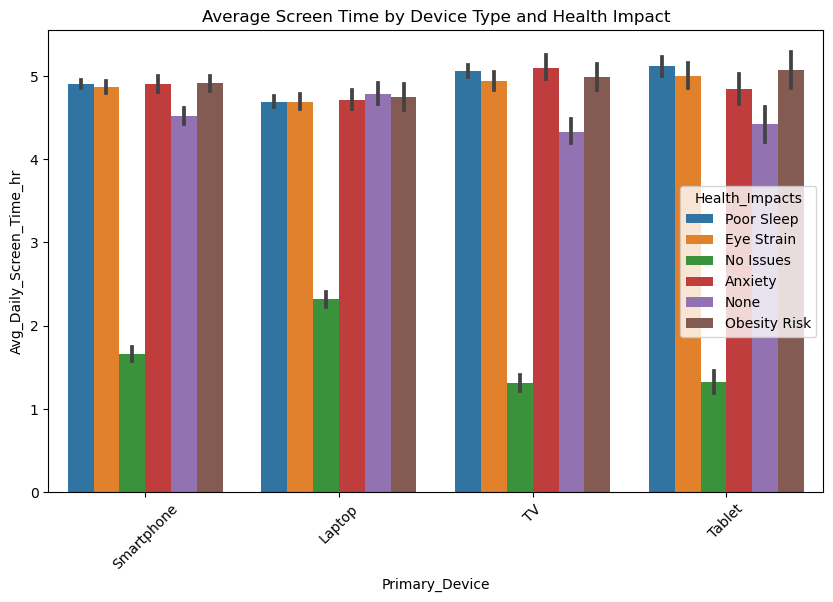

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.barplot(data=df_exploded,
            x="Primary_Device",
            y="Avg_Daily_Screen_Time_hr",
            hue="Health_Impacts")

plt.title("Average Screen Time by Device Type and Health Impact")
plt.xticks(rotation=45)
plt.show()



In [21]:
high_screen = df_exploded[
    df_exploded["Avg_Daily_Screen_Time_hr"] > 4
]

print(high_screen["Health_Impacts"].value_counts(), end="\n")

Health_Impacts
Poor Sleep      3667
Eye Strain      1768
Anxiety         1186
None            1105
Obesity Risk     923
Name: count, dtype: int64


In [38]:
disease_avg = {
    "Poor Sleep": 4.931329,
    "Obesity Risk": 4.924979,
    "Anxiety": 4.911252,
    "Eye Strain": 4.871814
}


In [39]:
def assign_disease_by_screen_time(screen_time):
    return min(
        disease_avg,
        key=lambda d: abs(screen_time - disease_avg[d])
    )


In [40]:
mask = df["Health_Impacts"] == "None"

df.loc[mask, "Health_Impacts"] = df.loc[
    mask, "Avg_Daily_Screen_Time_hr"
].apply(assign_disease_by_screen_time)
# here I replace None with Health_impact based on avg screen time 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [67]:
mask = df_exploded["Health_Impacts"] == "None"

df_exploded.loc[mask, "Health_Impacts"] = df_exploded.loc[
    mask, "Avg_Daily_Screen_Time_hr"
].apply(assign_disease_by_screen_time)

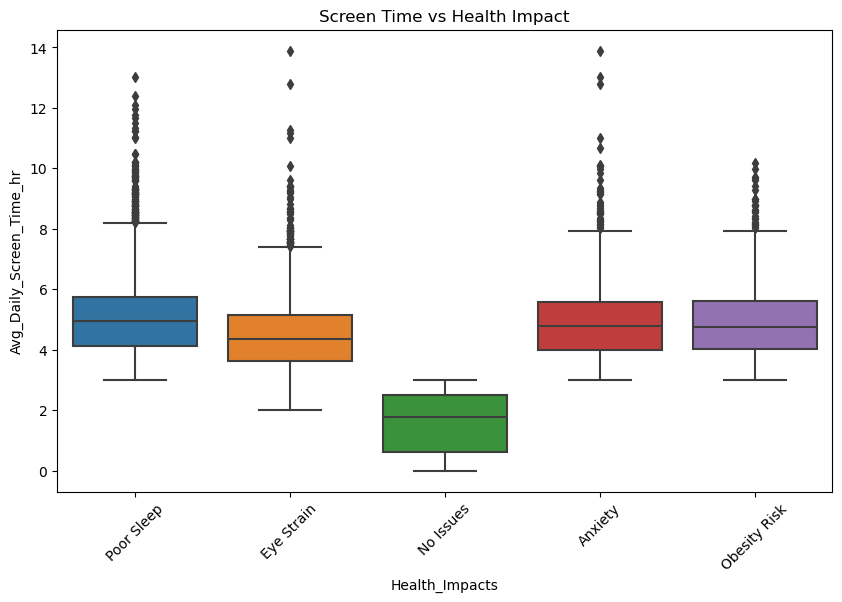

In [68]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df_exploded,
            x="Health_Impacts",
            y="Avg_Daily_Screen_Time_hr")

plt.xticks(rotation=45)
plt.title("Screen Time vs Health Impact")
plt.show()

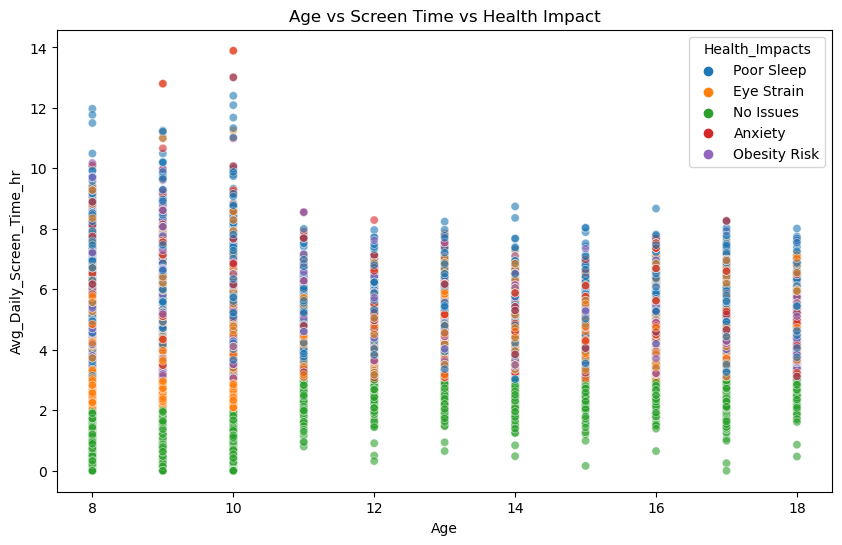

In [70]:

plt.figure(figsize=(10,6))

sns.scatterplot(data=df_exploded,
                x="Age",
                y="Avg_Daily_Screen_Time_hr",
                hue="Health_Impacts",
                alpha=0.6)

plt.title("Age vs Screen Time vs Health Impact")
plt.show()



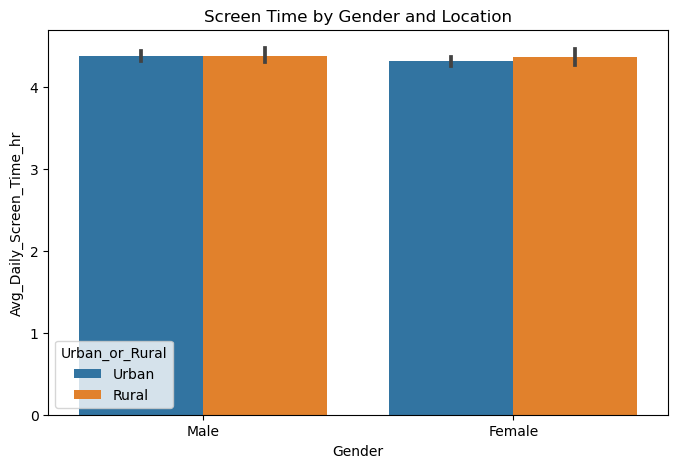

In [76]:
plt.figure(figsize=(8,5))

sns.barplot(data=df,
            x="Gender",
            y="Avg_Daily_Screen_Time_hr",
            hue="Urban_or_Rural")

plt.title("Screen Time by Gender and Location")
plt.show()



C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


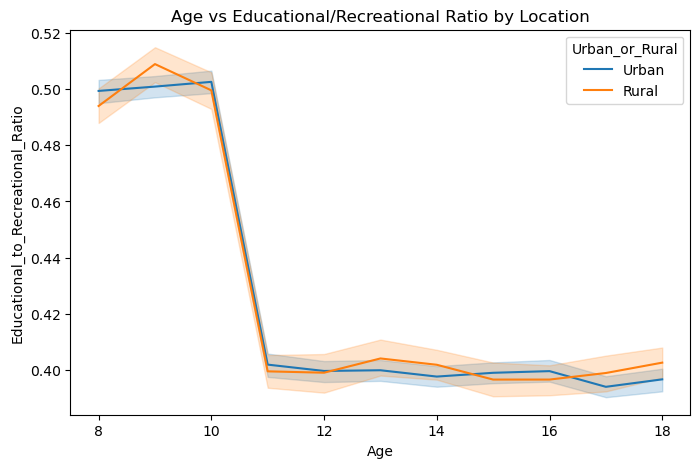

In [82]:
plt.figure(figsize=(8,5))

sns.lineplot(data=df_exploded,
             x="Age",
             y="Educational_to_Recreational_Ratio",
             hue="Urban_or_Rural",
             estimator="mean")

plt.title("Age vs Educational/Recreational Ratio by Location")
plt.show()

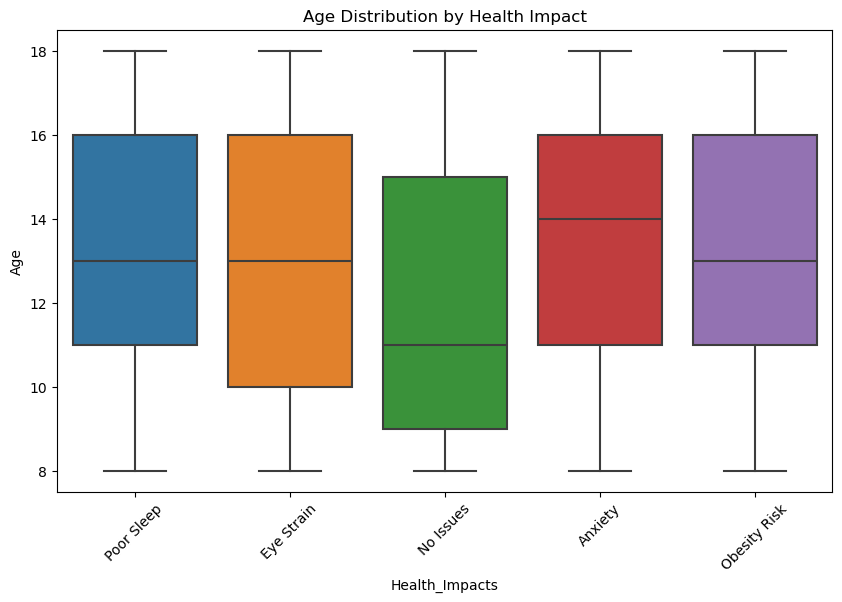

In [79]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df_exploded,
            x="Health_Impacts",
            y="Age")

plt.xticks(rotation=45)
plt.title("Age Distribution by Health Impact")
plt.show()

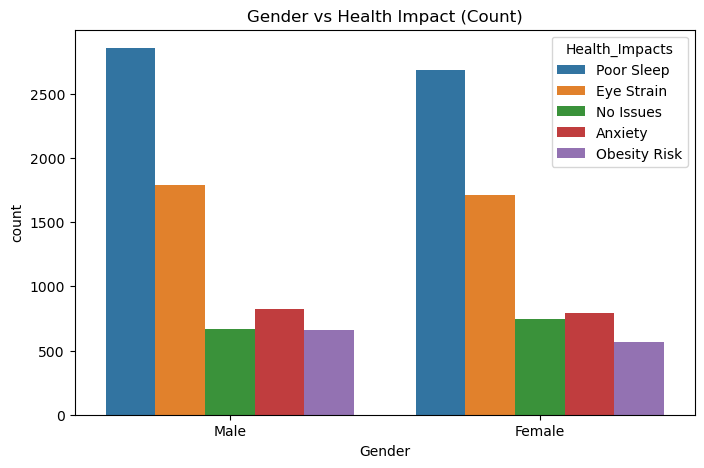

In [81]:
plt.figure(figsize=(8,5))

sns.countplot(data=df_exploded,
              x="Gender",
              hue="Health_Impacts")

plt.title("Gender vs Health Impact (Count)")
plt.show()
